##  Data Domain

The dataset is time series data set with per-hour information about weather condition in particular location.
It records date, temperaure (C), Dew point temperature(C), Relative Humidity(%), Wind Speed(Km/h), visibility(Km), Pressure(KPa) and Weather condition.


 

## Questions:

- Find the unique 'wind speed'values in data and the number of times 'wind speed' more than the mean value.
- Show the different weather conditions and their counts.
- Find all instances and the number of times when the weather is exactly clear.
- Find all instances where 'weather clear' and 'visibility above the mean value.
- Find all instances where 'weather is clear' and (relative humidity greater than 68 (mean) or visibility above 28(mean)).
- Show all records where weather condition is Fog.
- Show all instances when snow was recorded.
- Find the mean, max, min value of each column against each weather condition.
- Create box plots for the different variables in each weather condition to show the spread and any outliers.
- Visualize the average of each variable in some weather conditions ('Clear', 'Fog', 'Snow', 'Rain') for example.

## Loading data:

In [177]:
import pandas as pd

In [178]:
# load the data and show the first 5 rows
data = pd.read_csv(r"C:\Users\sanas\Downloads\file.csv")
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


## Data understanding:


In [179]:
data.shape

(8784, 8)

In [180]:
# show the columns names:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [181]:
# show the types of data in each column
data.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [182]:
# count unique values in each column

data.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [183]:
# count the non null values in each column and sum them
data.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [184]:
# top overview of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [185]:
# find duplicates and sum them:
duplicate=data.duplicated().sum()
duplicate

0

The data contains 8784 rows and 8 columns, with no Null values or duplicates.


In [186]:
data = data.rename(columns={"Weather" : "Weather_condition"})

## Exploratory Data Analysis


In [187]:
# Descriptive Statistics:

In [188]:
data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


- For the temperature:

            -- the mean value is 8.79 degree C,
            -- the Maximum is 33 degree C and the Minimum is -23 degree C.
            -- the standard deviation is 11.68 degree C
            -- about 75% or less of the data shows that the temperature is 
            
- The relative humidity:

            -- the mean is 67.4%
            -- the min is 18% and the maximum 100%
            -- the standard deviation is 16.9 %
            
- The Wind Speed : 

           -- Mean =14,9 Km/h
           -- the min is 0km/h and the max is about 83km/h
           -- about 75% or less of the data shows that wind speed is about 20km/h
           
- The visibility:

          -- Mean = 27.6 km
          -- the minimum is 0.2km and the maximum is 48.3 km.
          -- About 75% or less of the data shows that the visibility equal to 25km.
          
- The pressure : 

         -- About 75% or less of the data shows that the pressure is very close to the mean which is equal to 101kPa. 

In [189]:
data.describe(include = object)

,Date/Time,Weather_condition
count,8784,8784
unique,8784,50
top,1/1/2012 0:00,Mainly Clear
freq,1,2106


The more frequent weather condition is "Mainly Clear".

In [190]:
# find unique 'wind speed'values in data?
data['Wind Speed_km/h'].unique()

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2],
      dtype=int64)

In [191]:
# number of times 'wind speed more than the mean value (~15Km/h)? 

data[data['Wind Speed_km/h']>15]['Wind Speed_km/h'].value_counts().sum()

3638

We have 3638 times where the wind speed is above the mean value ( which is considered confortable for outdoor activities).

In [192]:
# show the different weather conditions and their counts:
data.Weather_condition.value_counts()

Weather_condition
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle      

In [193]:
# find all instances when the weather is exactly clear

data.groupby('Weather_condition').get_group('Clear')

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_condition
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear
114,1/5/2012 18:00,-7.1,-14.4,56,11,25.0,100.71,Clear
115,1/5/2012 19:00,-9.2,-15.4,61,7,25.0,100.80,Clear
116,1/5/2012 20:00,-9.8,-15.7,62,9,25.0,100.83,Clear
117,1/5/2012 21:00,-9.0,-14.8,63,13,25.0,100.83,Clear
...,...,...,...,...,...,...,...,...
8646,12/26/2012 6:00,-13.4,-14.8,89,4,25.0,102.47,Clear
8698,12/28/2012 10:00,-6.1,-8.6,82,19,24.1,101.27,Clear
8713,12/29/2012 1:00,-11.9,-13.6,87,11,25.0,101.31,Clear
8714,12/29/2012 2:00,-11.8,-13.1,90,13,25.0,101.33,Clear


In [194]:
# number of times when Weather is exactly clear?

data[data.Weather_condition=='Clear']['Weather_condition'].value_counts()

Weather_condition
Clear    1326
Name: count, dtype: int64

In [195]:
# find all instances where 'weather clear' and 'visibility above 28 (~the mean)':

data[(data['Visibility_km']>28) & (data['Weather_condition']=='Clear')]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_condition
351,1/15/2012 15:00,-15.4,-22.8,53,24,48.3,102.71,Clear
352,1/15/2012 16:00,-15.1,-22.8,52,24,48.3,102.79,Clear
425,1/18/2012 17:00,-11.3,-18.8,54,26,48.3,101.54,Clear
440,1/19/2012 8:00,-13.7,-18.4,68,19,48.3,101.84,Clear
441,1/19/2012 9:00,-12.7,-17.2,69,17,48.3,101.73,Clear
...,...,...,...,...,...,...,...,...
8384,12/15/2012 8:00,-10.7,-15.6,67,13,48.3,102.69,Clear
8385,12/15/2012 9:00,-10.4,-15.9,64,19,48.3,102.74,Clear
8389,12/15/2012 13:00,-8.4,-14.7,60,19,48.3,102.64,Clear
8631,12/25/2012 15:00,-7.1,-13.7,59,17,48.3,101.98,Clear


In [196]:
# find all instances where 'weather is clear' and (relative humidity greater than 68 (mean value) or visibility above 28 ).


In [197]:
data[((data['Visibility_km']>28) | (data['Rel Hum_%']>68)) & (data['Weather_condition']=='Clear') ]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_condition
351,1/15/2012 15:00,-15.4,-22.8,53,24,48.3,102.71,Clear
352,1/15/2012 16:00,-15.1,-22.8,52,24,48.3,102.79,Clear
365,1/16/2012 5:00,-19.1,-23.3,69,0,25.0,103.02,Clear
425,1/18/2012 17:00,-11.3,-18.8,54,26,48.3,101.54,Clear
432,1/19/2012 0:00,-16.6,-20.9,69,7,25.0,101.94,Clear
...,...,...,...,...,...,...,...,...
8646,12/26/2012 6:00,-13.4,-14.8,89,4,25.0,102.47,Clear
8698,12/28/2012 10:00,-6.1,-8.6,82,19,24.1,101.27,Clear
8713,12/29/2012 1:00,-11.9,-13.6,87,11,25.0,101.31,Clear
8714,12/29/2012 2:00,-11.8,-13.1,90,13,25.0,101.33,Clear


In [198]:
# show all records where weather condition is Fog

In [199]:
data[data.Weather_condition=='Fog']

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_condition
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,1/1/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,1/1/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,Fog
...,...,...,...,...,...,...,...,...
8716,12/29/2012 4:00,-16.0,-17.2,90,6,9.7,101.25,Fog
8717,12/29/2012 5:00,-14.8,-15.9,91,4,6.4,101.25,Fog
8718,12/29/2012 6:00,-13.8,-15.3,88,4,9.7,101.25,Fog
8719,12/29/2012 7:00,-14.8,-16.4,88,7,8.0,101.22,Fog


In [200]:

# show all instances when snow was recorded:

data[data['Weather_condition'].str.contains('Snow')]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_condition
41,1/2/2012 17:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers
44,1/2/2012 20:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers
45,1/2/2012 21:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers
47,1/2/2012 23:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers
48,1/3/2012 0:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [201]:
# mean value of each column against each weather condition

data_means=data.groupby('Weather_condition')[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km','Press_kPa']] .mean()

data_means



,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather_condition,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443
Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000
"Drizzle,Snow",1.050000,0.150000,93.500000,14.000000,10.500000,100.890000
"Drizzle,Snow,Fog",0.693333,0.120000,95.866667,15.533333,5.513333,99.281333
Fog,4.303333,3.159333,92.286667,7.946667,6.248000,101.184067
Freezing Drizzle,-5.657143,-8.000000,83.571429,16.571429,9.200000,100.202857


In [202]:
# max value of each column against each weather condition


In [203]:
weather_data_max=data.groupby('Weather_condition')[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km','Press_kPa']] .max()

weather_data_max

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather_condition,,,,,,
Clear,32.8,20.4,99,33,48.3,103.63
Cloudy,30.5,22.6,99,54,48.3,103.65
Drizzle,18.8,17.7,96,30,25.0,101.56
"Drizzle,Fog",19.9,19.1,100,28,9.7,102.07
"Drizzle,Ice Pellets,Fog",0.4,-0.7,92,20,4.0,100.79
"Drizzle,Snow",1.2,0.2,95,19,11.3,101.15
"Drizzle,Snow,Fog",1.1,0.6,98,32,9.7,100.15
Fog,20.8,19.6,100,22,9.7,103.04
Freezing Drizzle,-2.3,-3.3,93,26,12.9,101.02


In [204]:
# min value of each column against each weather condition:

In [205]:
weather_data_min=data.groupby('Weather_condition')[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km','Press_kPa']] .min()

weather_data_min

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather_condition,,,,,,
Clear,-23.3,-28.5,20,0,11.3,99.52
Cloudy,-21.4,-26.8,18,0,11.3,98.39
Drizzle,1.1,-0.2,74,0,6.4,97.84
"Drizzle,Fog",0.0,-1.6,85,0,1.0,98.65
"Drizzle,Ice Pellets,Fog",0.4,-0.7,92,20,4.0,100.79
"Drizzle,Snow",0.9,0.1,92,9,9.7,100.63
"Drizzle,Snow,Fog",0.3,-0.1,92,7,2.4,97.79
Fog,-16.0,-17.2,80,0,0.2,98.31
Freezing Drizzle,-9.0,-12.2,78,6,4.8,98.44


In [206]:
# Data visualization the average of each variable in some weather conditions ('Clear', 'Fog', 'Snow', 'Rain').


In [207]:
#Creating box plots for temperature, dew point, relative humidity, wind speed, visibility,and pressure for each weather condition. 
# Each subplot will show the spread and any outliers for each variable across each weather condition.

C:\Users\sanas\AppData\Local\Temp\ipykernel_3480\1392661304.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanas\AppData\Local\Temp\ipykernel_3480\1392661304.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanas\AppData\Local\Temp\ipykernel_3480\1392661304.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanas\AppData\Local\Temp\ipykernel_3480\1392661304.py:11: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\sanas\AppData\Local\Temp\ipykernel_3480\1392661304.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanas\AppData\Local\Temp\ipykernel_3480\1392661304.py:11: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\san

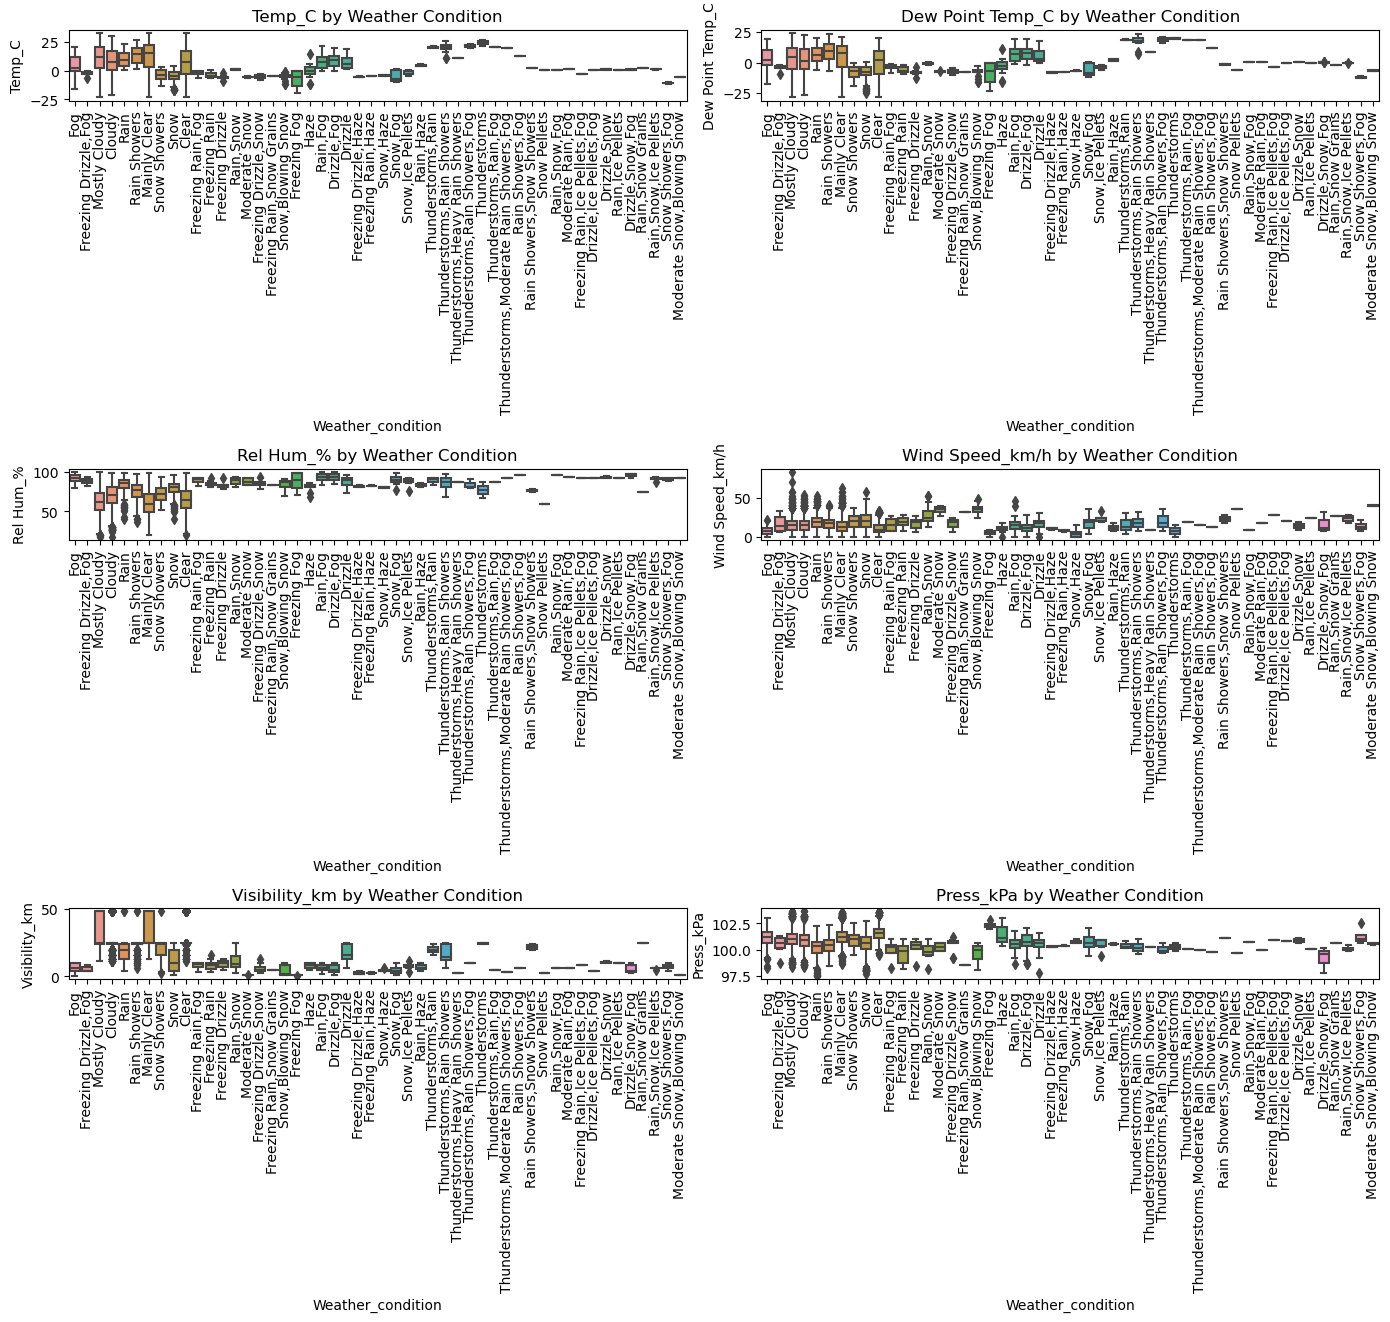

In [208]:

# Plotting the data
plt.figure(figsize=(14, 10))

# Create subplots for each variable
variables = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
for i, var in enumerate(variables, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Weather_condition', y=var, data=data)
    plt.xticks(rotation=90)
    plt.title(f'{var} by Weather Condition')
    plt.tight_layout()

plt.show()


 

C:\Users\sanas\AppData\Local\Temp\ipykernel_3480\3463984005.py:24: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanas\AppData\Local\Temp\ipykernel_3480\3463984005.py:24: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanas\AppData\Local\Temp\ipykernel_3480\3463984005.py:24: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanas\AppData\Local\Temp\ipykernel_3480\3463984005.py:24: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanas\AppData\Local\Temp\ipykernel_3480\3463984005.py:24: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


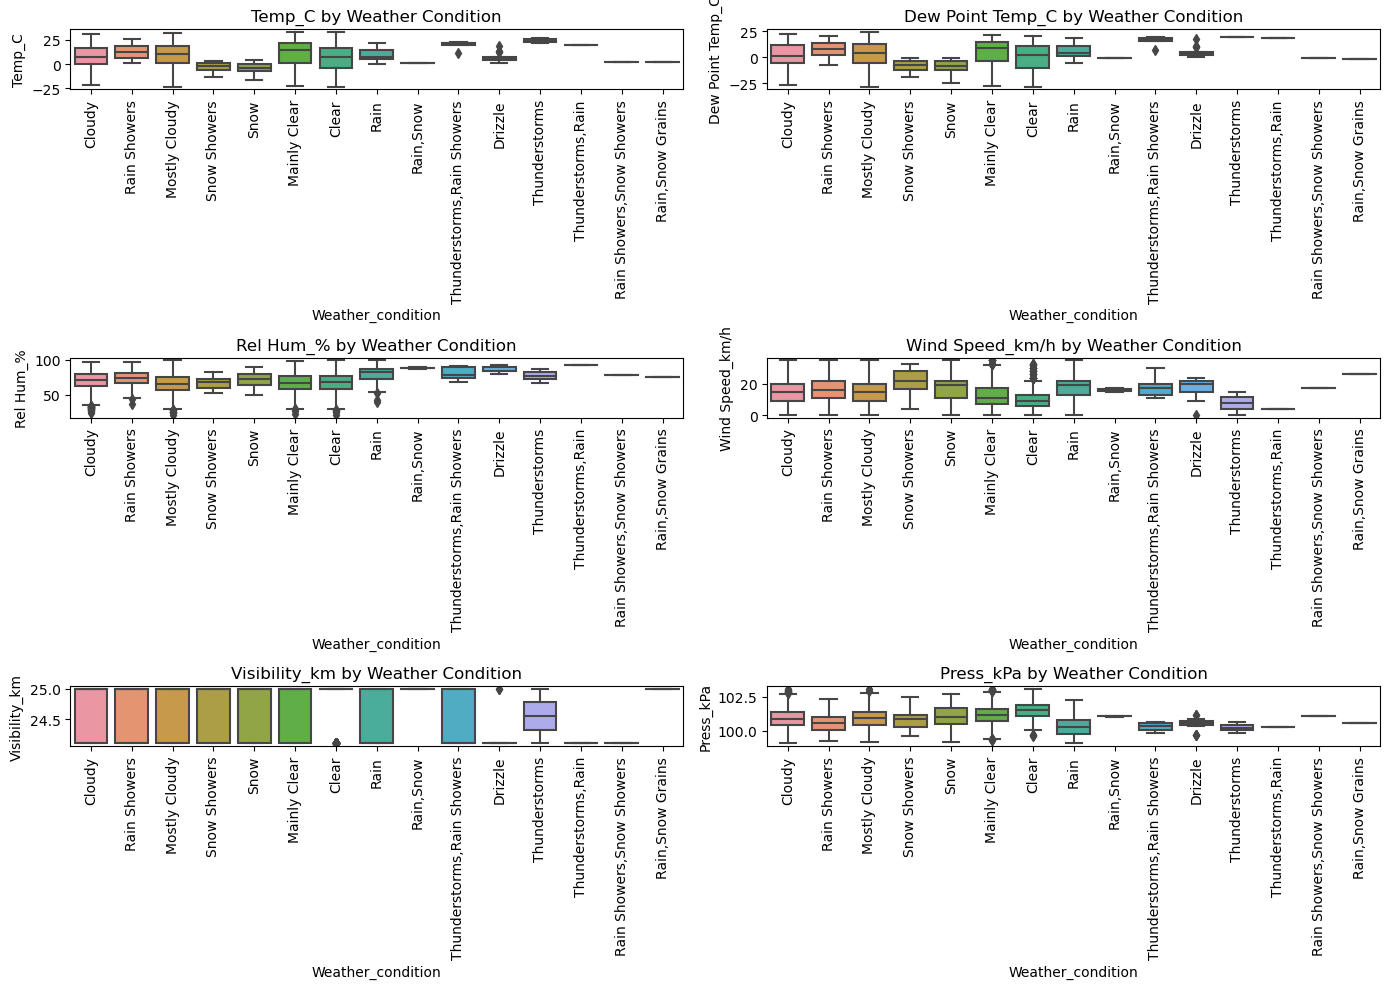

In [209]:
# Function to remove outliers based on IQR
def remove_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Remove outliers for each variable
variables = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
for var in variables:
    data = remove_outliers(data, var)

# Plotting the data
plt.figure(figsize=(14, 10))

# Create subplots for each variable
for i, var in enumerate(variables, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Weather_condition', y=var, data=data)
    plt.xticks(rotation=90)
    plt.title(f'{var} by Weather Condition')
    plt.tight_layout()

Let's see our data after removing outliers.

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5063 entries, 20 to 8766
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date/Time          5063 non-null   object 
 1   Temp_C             5063 non-null   float64
 2   Dew Point Temp_C   5063 non-null   float64
 3   Rel Hum_%          5063 non-null   int64  
 4   Wind Speed_km/h    5063 non-null   int64  
 5   Visibility_km      5063 non-null   float64
 6   Press_kPa          5063 non-null   float64
 7   Weather_condition  5063 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 356.0+ KB


We must reset indexes of our data after removing outliers.

In [211]:
# Reset index after removing outliers
data = data.reset_index(drop=True)


In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5063 entries, 0 to 5062
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date/Time          5063 non-null   object 
 1   Temp_C             5063 non-null   float64
 2   Dew Point Temp_C   5063 non-null   float64
 3   Rel Hum_%          5063 non-null   int64  
 4   Wind Speed_km/h    5063 non-null   int64  
 5   Visibility_km      5063 non-null   float64
 6   Press_kPa          5063 non-null   float64
 7   Weather_condition  5063 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 316.6+ KB


In [213]:
# Data visualization the average of each variable in some weather conditions ('Clear', 'Fog', 'Snow', 'Rain').


In [214]:
data_means=data.groupby('Weather_condition')[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km','Press_kPa']] .mean()


C:\Users\sanas\AppData\Local\Temp\ipykernel_3480\3723397678.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanas\AppData\Local\Temp\ipykernel_3480\3723397678.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanas\AppData\Local\Temp\ipykernel_3480\3723397678.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanas\AppData\Local\Temp\ipykernel_3480\3723397678.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanas\AppData\Local\Temp\ipykernel_3480\3723397678.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


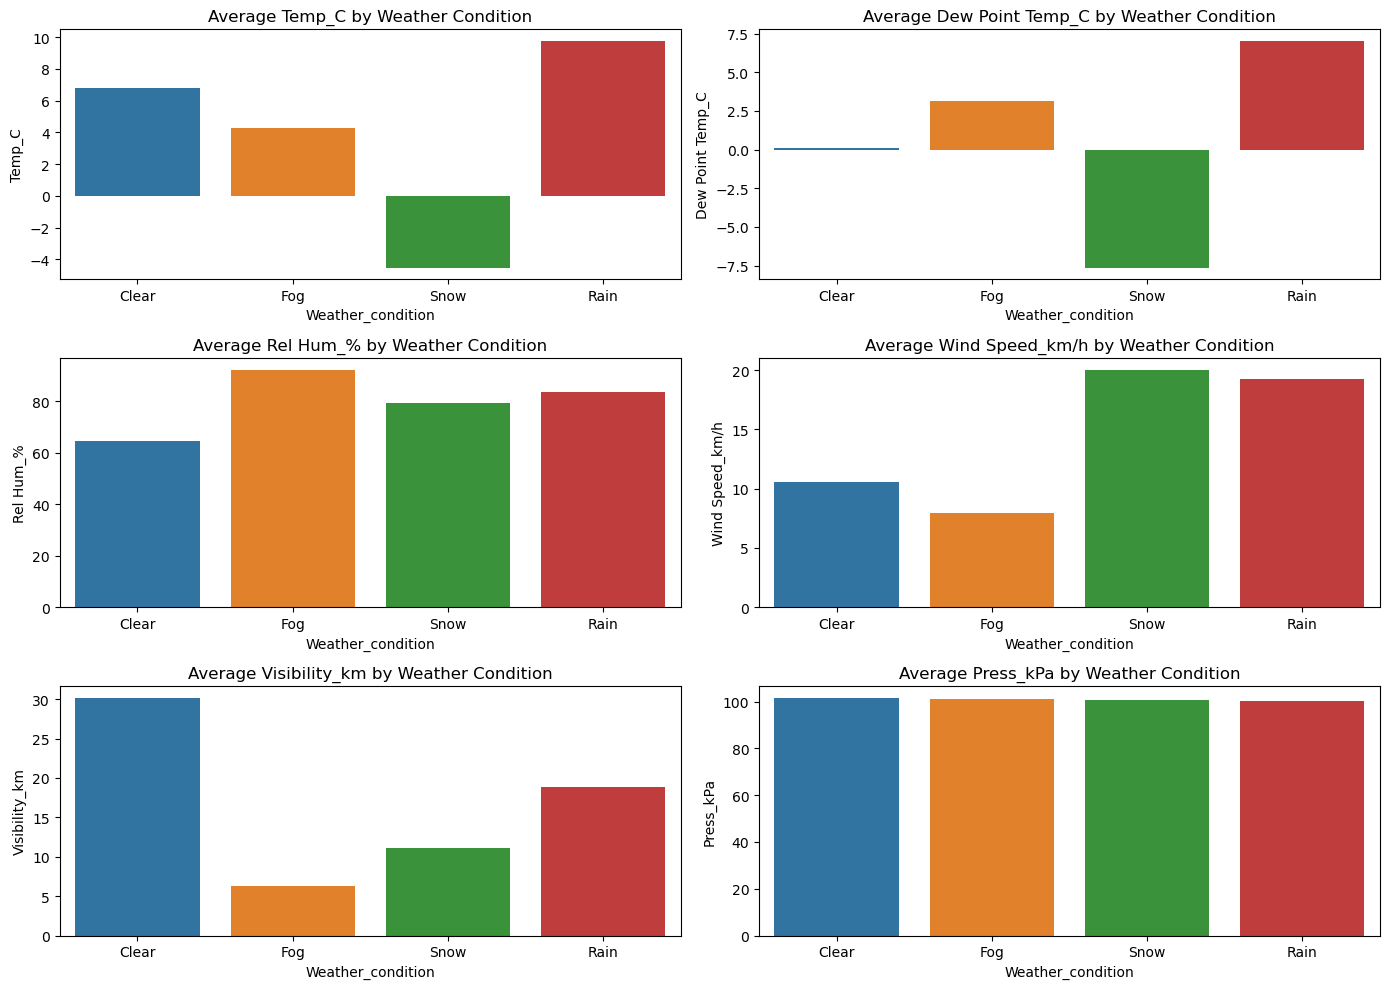

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns
# Filter the data for 'Clear','Fog', 'Snow' and 'Rain' conditions
data_means_filtered = data_means.loc[['Clear', 'Fog', 'Snow', 'Rain']]

# Plotting the data
plt.figure(figsize=(14, 10))

# Create subplots for each variable
variables = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
for i, var in enumerate(variables, 1):
    plt.subplot(3, 2, i)
    sns.barplot(x=data_means_filtered.index, y=var, data=data_means_filtered)
    plt.xticks(rotation=0)
    plt.title(f'Average {var} by Weather Condition')
    plt.tight_layout()

plt.show()

- In Clear weather for example : the average temperature is about 7 deg C, Dew_point of 0 deg C visibility about 30km, Wind speed around 11km/h, Relative Humidity about 62%, pressure on the average of 101kPa. 